In [97]:
import numpy as np
import pandas as pd

In [98]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [99]:
df_train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [100]:
df_train.isnull().any()

id               False
day              False
pressure         False
maxtemp          False
temparature      False
mintemp          False
dewpoint         False
humidity         False
cloud            False
sunshine         False
winddirection    False
windspeed        False
rainfall         False
dtype: bool

In [101]:
id_col = df_train['id']

In [102]:
id_col

0          0
1          1
2          2
3          3
4          4
        ... 
2185    2185
2186    2186
2187    2187
2188    2188
2189    2189
Name: id, Length: 2190, dtype: int64

In [103]:
df_train = df_train.drop('id', axis =1)

In [104]:
df_train = df_train.drop('day', axis =1)

In [105]:
df_train

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [171]:
from sklearn.preprocessing import RobustScaler
df_robust = df_train.copy()
df_robust['winddirection'] = df_robust['winddirection'].fillna(df_robust['winddirection'].median())
robust_scaler = RobustScaler()
df_robust['winddirection'] = robust_scaler.fit_transform(df_robust[['winddirection']])
df_robust

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,-0.0625,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,-0.1250,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,0.0000,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,-0.0625,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,-0.1875,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,-0.1875,22.1,1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,-0.1250,35.3,1
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,-0.1875,32.9,1
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,-0.1875,18.0,1


In [158]:
mean_value = df_train['winddirection'].mean(skipna=True)
df_train_filled = df_train.fillna(mean_value)
scaler = StandardScaler()
df_train_filled['winddirection'] = scaler.fit_transform(df_train_filled[['winddirection']])
df_train_filled

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,-0.560901,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,-0.685925,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,-0.435876,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,-0.560901,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,-0.810950,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,-0.810950,22.1,1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,-0.685925,35.3,1
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,-0.810950,32.9,1
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,-0.810950,18.0,1


In [172]:
X_train =  df_robust.iloc[:, :-1]

In [106]:
y_train = df_train.iloc[:, -1:]

In [159]:
X_train =  df_train_filled.iloc[:, :-1]

In [160]:
X_train

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,-0.560901,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,-0.685925,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,-0.435876,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,-0.560901,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,-0.810950,24.8
...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,-0.810950,22.1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,-0.685925,35.3
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,-0.810950,32.9
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,-0.810950,18.0


In [173]:
from sklearn.svm import SVC

In [192]:
model = SVC(kernel='rbf', gamma=0.04)
model.fit(X_train, y_train)

C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.04)

In [193]:
accuracy = model.score(X_train, y_train)
accuracy

0.9525114155251142

In [194]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataC

array([0.79223744, 0.79452055, 0.8196347 , 0.82648402, 0.79680365])

In [197]:
print("Mean accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Mean accuracy: 0.81 (+/- 0.03)


In [ ]:
id_col_test = df_test['id']

In [198]:
id_col_test

0      2190
1      2191
2      2192
3      2193
4      2194
       ... 
725    2915
726    2916
727    2917
728    2918
729    2919
Name: id, Length: 730, dtype: int64

In [ ]:
df_test = df_test.drop('id', axis =1)
df_test = df_test.drop('day', axis =1)

In [200]:
df_test.isnull().any()

pressure         False
maxtemp          False
temparature      False
mintemp          False
dewpoint         False
humidity         False
cloud            False
sunshine         False
winddirection     True
windspeed        False
dtype: bool

In [201]:
import matplotlib.pyplot as plt

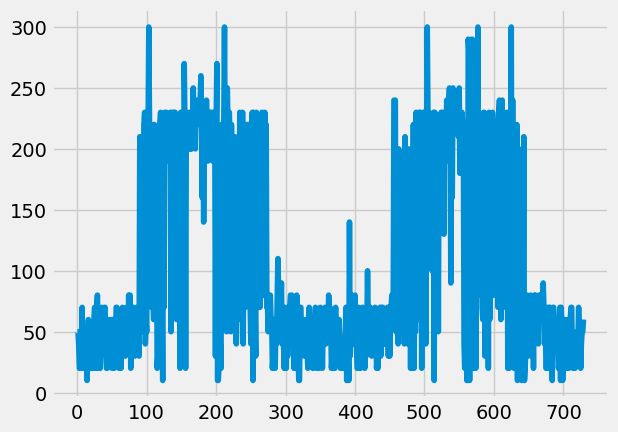

In [202]:
plt.plot(df_test['winddirection'])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test['winddirection'] = scaler.fit_transform(df_test[['winddirection']])

In [203]:
df_test

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...
725,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [143]:
mean_value = df_test['winddirection'].mean(skipna=True)

In [145]:
df_test_filled = df_test.fillna(mean_value)
scaler = StandardScaler()
df_test_filled['winddirection'] = scaler.fit_transform(df_test_filled[['winddirection']])
df_test_filled

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,-0.660957,24.3
1,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,-0.660957,35.3
2,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,-0.783531,16.9
3,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,-1.028679,50.6
4,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,-1.028679,19.4
...,...,...,...,...,...,...,...,...,...,...
725,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,-1.028679,34.3
726,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,-0.783531,25.2
727,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,-0.660957,21.9
728,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,-0.660957,39.5


In [204]:
df_robust_test = df_test.copy()
df_robust_test['winddirection'] = df_robust_test['winddirection'].fillna(df_robust_test['winddirection'].median())
robust_scaler = RobustScaler()
df_robust_test['winddirection'] = robust_scaler.fit_transform(df_robust_test[['winddirection']])
df_robust_test

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,-0.1250,24.3
1,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,-0.1250,35.3
2,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,-0.1875,16.9
3,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,-0.3125,50.6
4,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,-0.3125,19.4
...,...,...,...,...,...,...,...,...,...,...
725,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,-0.3125,34.3
726,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,-0.1875,25.2
727,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,-0.1250,21.9
728,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,-0.1250,39.5


In [205]:
from sklearn.metrics import accuracy_score

In [206]:
y_pred=model.predict(df_robust_test)

In [207]:
len(y_pred)

730

In [208]:
df = pd.DataFrame({
    'id': id_col_test,
    'rainfall': y_pred
})

In [209]:
df.to_csv('rainfall_predictions.csv', index=False)